In [1]:
import tensorflow
import keras
import warnings
warnings.filterwarnings('ignore')

C:\Users\R.Hayeri\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1- Data Preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

In [3]:
## Importing the data set
dataset=pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:,3:13].values   # The index 13th is not included.
y = dataset.iloc[:,13].values

In [4]:
## Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x_1=LabelEncoder()
x[:,1] = labelencoder_x_1.fit_transform(x[:,1])
labelencoder_x_2=LabelEncoder()
x[:,2] = labelencoder_x_2.fit_transform(x[:,2])
onehotencoder = OneHotEncoder(categorical_features = [1])
x = onehotencoder.fit_transform(x).toarray()
X = x[:,1:]

In [5]:
## Splitting the data set into Training set and Test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [6]:
## Features Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## 2- Making an Artificial Neural Network(ANN)

In [7]:
'''
Importing the modules from keras library 
(Sequential module to initialize our ANN and Dence module to build the layers of ANN )

'''
from keras.models import Sequential
from keras.layers import Dense

In [8]:
## Initializing our ANN
classifier = Sequential()

In [9]:
## Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu' , input_dim = 11))

## Adding the second hidden layer 
classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu'))

## Adding the output layer 
classifier.add(Dense(output_dim=1 , init = 'uniform', activation = 'sigmoid'))

##Compiling our ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])

In [10]:
## Fitting the ANN to the Training Set
class_1 = classifier.fit(X_train, y_train,validation_split=0.1, batch_size= 10 ,nb_epoch= 100)
print('The Model was Trained')

Train on 6750 samples, validate on 750 samples
Epoch 1/100
6750/6750 [==============================] - 1s 175us/step - loss: 0.5644 - acc: 0.7957 - val_loss: 0.4311 - val_acc: 0.7960
Epoch 2/100
6750/6750 [==============================] - 1s 77us/step - loss: 0.4117 - acc: 0.8096 - val_loss: 0.3920 - val_acc: 0.8120
Epoch 3/100
6750/6750 [==============================] - 1s 81us/step - loss: 0.3820 - acc: 0.8200 - val_loss: 0.3739 - val_acc: 0.8093
Epoch 4/100
6750/6750 [==============================] - 1s 83us/step - loss: 0.3691 - acc: 0.8369 - val_loss: 0.3655 - val_acc: 0.8413
Epoch 5/100
6750/6750 [==============================] - 1s 85us/step - loss: 0.3623 - acc: 0.8483 - val_loss: 0.3615 - val_acc: 0.8453
Epoch 6/100
6750/6750 [==============================] - 1s 84us/step - loss: 0.3583 - acc: 0.8499 - val_loss: 0.3572 - val_acc: 0.8480
Epoch 7/100
6750/6750 [==============================] - 1s 77us/step - loss: 0.3546 - acc: 0.8554 - val_loss: 0.3552 - val_acc: 0.8480


6750/6750 [==============================] - 1s 105us/step - loss: 0.3348 - acc: 0.8650 - val_loss: 0.3302 - val_acc: 0.8667
Epoch 61/100
6750/6750 [==============================] - 1s 100us/step - loss: 0.3343 - acc: 0.8646 - val_loss: 0.3298 - val_acc: 0.8667
Epoch 62/100
6750/6750 [==============================] - 1s 96us/step - loss: 0.3341 - acc: 0.8644 - val_loss: 0.3287 - val_acc: 0.8653
Epoch 63/100
6750/6750 [==============================] - 1s 99us/step - loss: 0.3337 - acc: 0.8662 - val_loss: 0.3299 - val_acc: 0.8627
Epoch 64/100
6750/6750 [==============================] - 1s 99us/step - loss: 0.3340 - acc: 0.8637 - val_loss: 0.3286 - val_acc: 0.8640
Epoch 65/100
6750/6750 [==============================] - 1s 98us/step - loss: 0.3331 - acc: 0.8634 - val_loss: 0.3291 - val_acc: 0.8667
Epoch 66/100
6750/6750 [==============================] - 1s 99us/step - loss: 0.3334 - acc: 0.8630 - val_loss: 0.3292 - val_acc: 0.8613
Epoch 67/100
6750/6750 [============================

## 3- Making the Prediction and Evaluating Our Model

In [127]:
## Predicting the Test Results
y_pred = classifier.predict(X_test)
y_pred =(y_pred > 0.5)

In [128]:
## Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)


In [129]:
cm

array([[1870,  121],
       [ 235,  274]], dtype=int64)

In [134]:
test_acc=(cm[0,0]+cm[1,1])/sum(sum(cm))
test_acc

0.8576

In [131]:
sum(sum(cm))

2500

In [82]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [108]:
class_1.history


{'acc': [0.86281480828921,
  0.8634074017736647,
  0.8645925861817819,
  0.8642962904771169,
  0.8620740679458335,
  0.8634074009789361,
  0.864740734718464,
  0.8626666598849826,
  0.8638518450878284,
  0.8628148091280902,
  0.8638518443814031,
  0.8622222163500609,
  0.8639999938894202,
  0.8611851785359559,
  0.8637036964628432,
  0.8634074011113908,
  0.8648888828136303,
  0.8662222156701265,
  0.8654814754592047,
  0.8623703635180437,
  0.8647407344535545,
  0.8626666607238628,
  0.8617777709607725,
  0.8625185119222711,
  0.8665185113747914,
  0.8614814748145916,
  0.8625185127280377,
  0.8625185127611513,
  0.8616296228656063,
  0.8626666597966794,
  0.8629629567817405,
  0.865629623333613,
  0.8616296233512737,
  0.8648888822838112,
  0.8656296227596424,
  0.8623703636946501,
  0.8637036976990876,
  0.86281480828921,
  0.8613333270726381,
  0.8642962897265399,
  0.8648888822838112,
  0.8642962896382367,
  0.8637036977432392,
  0.8623703633414375,
  0.8644444383515252,
  0.86444

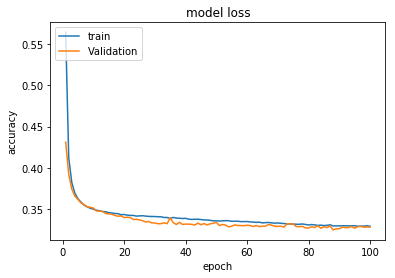

In [ ]:
plt.plot(list(range(1,len(class_1.history['loss'])+1)),class_1.history['loss'])
plt.plot(list(range(1,len(class_1.history['val_loss'])+1)),class_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

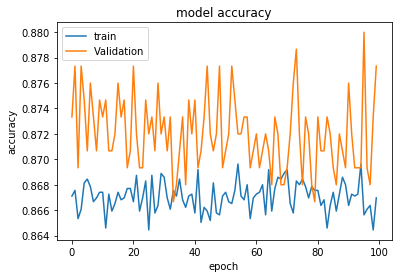

In [137]:
plt.plot(list(range(len(class_1.history['acc']))),class_1.history['acc'])
plt.plot(list(range(len(class_1.history['acc']))),class_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu' , input_dim = 11))
    classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim=1 , init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
    return clasifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 2, nb_epoch = 5)
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 , n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
    

In [ ]:
## Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu' , input_dim = 11))
    classifier.add(Dense(output_dim=6 , init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim=1 , init = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
    return clasifier
classifier = KerasClassifier(build_fn = build_classifier)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10 , n_jobs = -1)
mean = accuracies.mean()
variance = accuracies.std()
parameters = {'betch size': [25, 32]}
    